# **Statistical learning final project**: exploratory data analysis

### Daniel A.
### UID: 100444499

## Importing libraries, data and setting options

In [181]:
# Importing libraries
library(dplyr)
library(ggplot2)
library(stringr)
library(gridExtra)
library(outliers)
library(PerformanceAnalytics)
library(foreach)

In [182]:
# turn off warnings
options(warn=-1)

In [183]:
# importing the data
df <- read.csv('./data/data.csv')

## Helper Functions

In [184]:
# function to plot
plots <- function(dataset, col, fw=FALSE, hist='default',
                  density='default' , bins='default',
                  xtick_angles='default', sep=FALSE) {
    var <- dataset %>% dplyr::select(col)
    if (bins == 'default') {bins <- rep(10,2)}
    if (xtick_angles == 'default') {xtick_angles <- rep(90,2)}
    if (hist == 'default') {hist <- c(FALSE,FALSE)}
    if (density == 'default') {density <- c(TRUE,TRUE)}

    p1 <- dataset %>% ggplot(aes(x=var[,1])) +
        geom_boxplot() +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p2 <- dataset %>% ggplot(aes(x=var[,1], fill=hdi_cat)) +
        geom_boxplot() +
        ggtitle(str_interp("${col} grouped by HDI")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p3 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[1]))
    p4 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col} by HDI group")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[2]))
    if (hist[1] == TRUE) {
        p3 <- p3 + geom_histogram(aes(y=..density..),bins=bins[1])}
    if (hist[2] == TRUE) {
        p4 <- p4 + geom_histogram(show.legend = FALSE,bins=bins[2],
                                  aes(fill=hdi_cat,y=..density..))}
    if (density[1] == TRUE) {
        p3 <- p3 + geom_density()}
    if (density[2] == TRUE) {
        p4 <- p4 + geom_density(aes(group=hdi_cat,colour=hdi_cat,fill=hdi_cat))}
    if (fw == TRUE) {p4 <- p4 + facet_wrap(~hdi_cat, nrow = 1)}
    if (sep == TRUE) {
        grid.arrange(p1,p2, nrow=2)
        grid.arrange(p3,p4, nrow=2)}
    else {grid.arrange(p1,p2,p3,p4, nrow=4)}
}

In [185]:
# Helper function to colour num. variables by cat. variables
colors <- function(cat_var, colors_vector) {
    kleuren <- as.numeric(as.factor(cat_var))
    foreach (i=1:length(kleuren), kleur=kleuren) %do% {
        kleuren[i] = colors_vector[kleur]
    }
    return(kleuren)
}

## Variables

- **year**: year the data was obtained in
- **year_code**: code for the year as the world bank databank sets it
- **country_name**: name of the country
- **country_code**: alpha-3 ISO 3166 code for the country
- **gdp**: gross domestic product (in current US$)
- **foreign_inv_inflows**: Foreign direct investment, net inflows (BoP, current US$)
- **life_exp**: Life expectancy at birth, total (years)
- **exports_perc_gdp**: Exports of goods and services (as a % of GDP)
- **inflation_perc**: Inflation, consumer prices (annual %)
- **education_years**: Compulsory education, duration (years)
- **education_perc_gdp**: Government expenditure on education, total (as a % of GDP)
- **gds_perc_gdp**: Gross domestic savings (as a % of GDP)
- **gross_savings_perc_gdp**: Gross savings (as a % of GDP)
- **int_tourism_arrivals**: International tourism, number of arrivals
- **int_tourism_receipts**: International tourism, receipts (in current US$)
- **gni**: gross national income (in current US$)
- **perc_internet_users**: Individuals using the Internet (as a % of population)
- **hdi**: human development index (target variable)
- **hdi_cat**: Human development index as a category (target variable)

In [187]:
# setting colnames for variables to use in the analysis
cols = names(df)
cols = cols[6:(length(cols)-2)]

In [198]:
# Selecting colours per HDI
color_1 <- "blueviolet"
color_2 <- "red"
color_3 <- "black"
color_4 <- "green"
palette <- c(color_1,color_2,color_3,color_4)
hdi_colours <- colors(df$hdi_cat,palette)

## Plots per variable

### GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


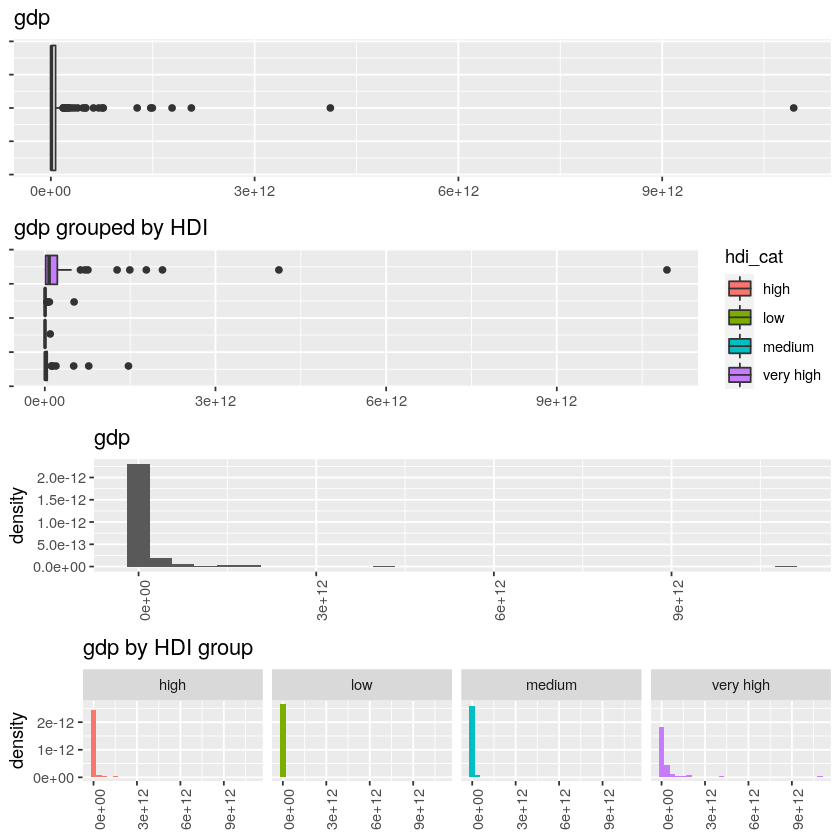

In [126]:
plots(dataset=df, col=cols[1], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

There's several extreme outliers for GDP, not only in general but also per group and most values concentrate around a specific range. The highest gdp countries

In [142]:
quantile(df$gdp)

0%          25%          50%          75%         100% 
7.219646e+07 2.824194e+09 9.640650e+09 6.920484e+10 1.093642e+13

Our main, general outliers are the following:

In [151]:
df$country_name[df$gdp>1000000000000]

[1] "China"          "France"         "Germany"        "Italy"         
[5] "Japan"          "United Kingdom" "United States"

### Foreign Investment Inflows

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


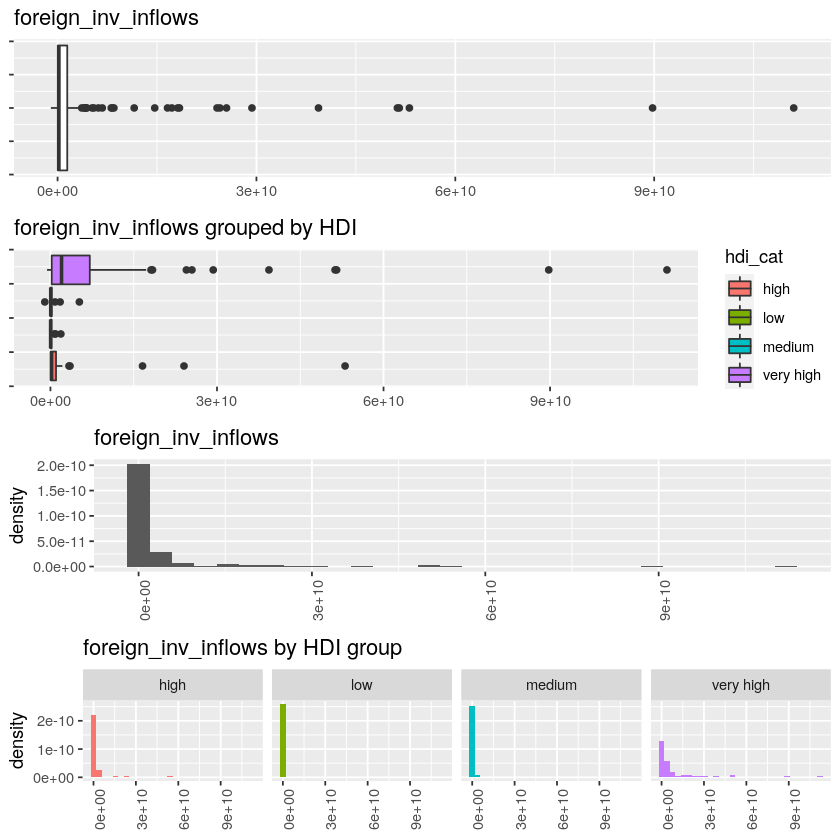

In [152]:
plots(dataset=df, col=cols[2], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Life Expectancy

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


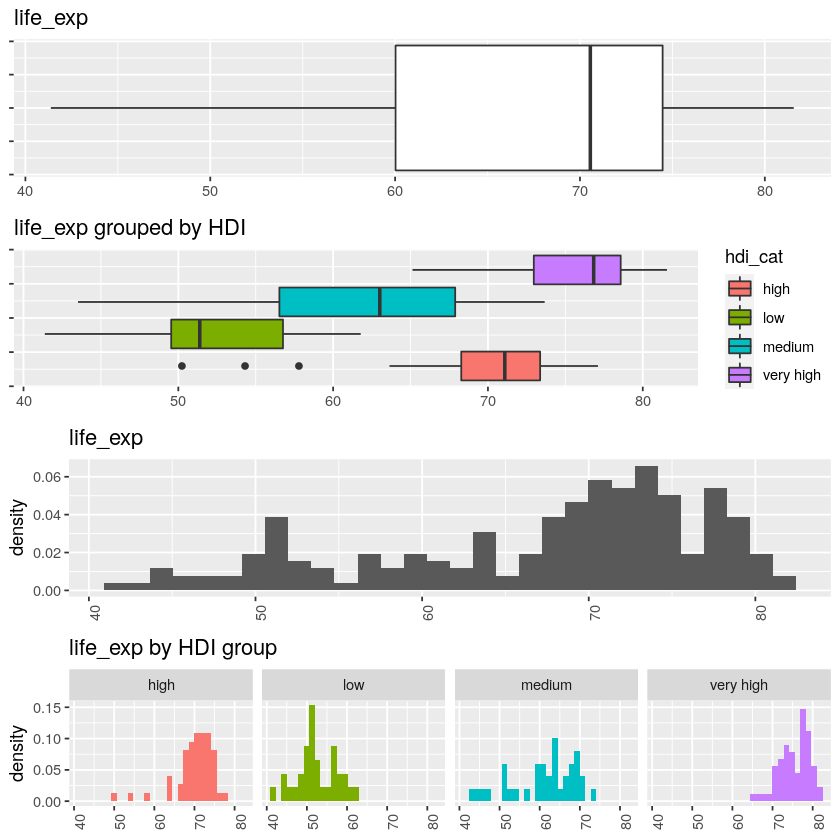

In [153]:
plots(dataset=df, col=cols[3], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Exports as a percentage of GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


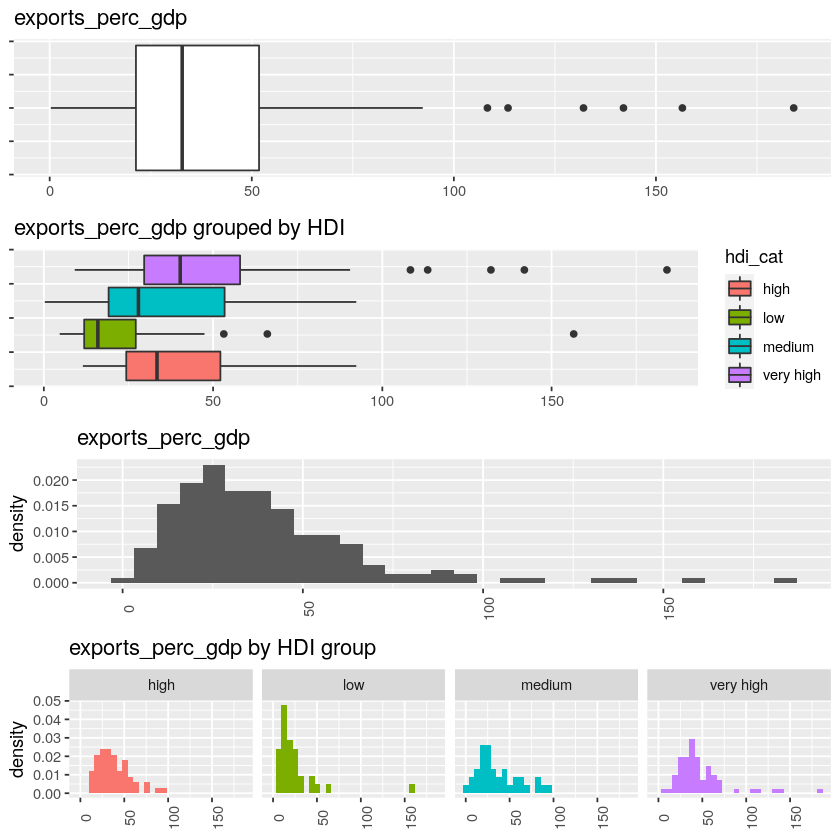

In [155]:
plots(dataset=df, col=cols[4], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Inflation

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


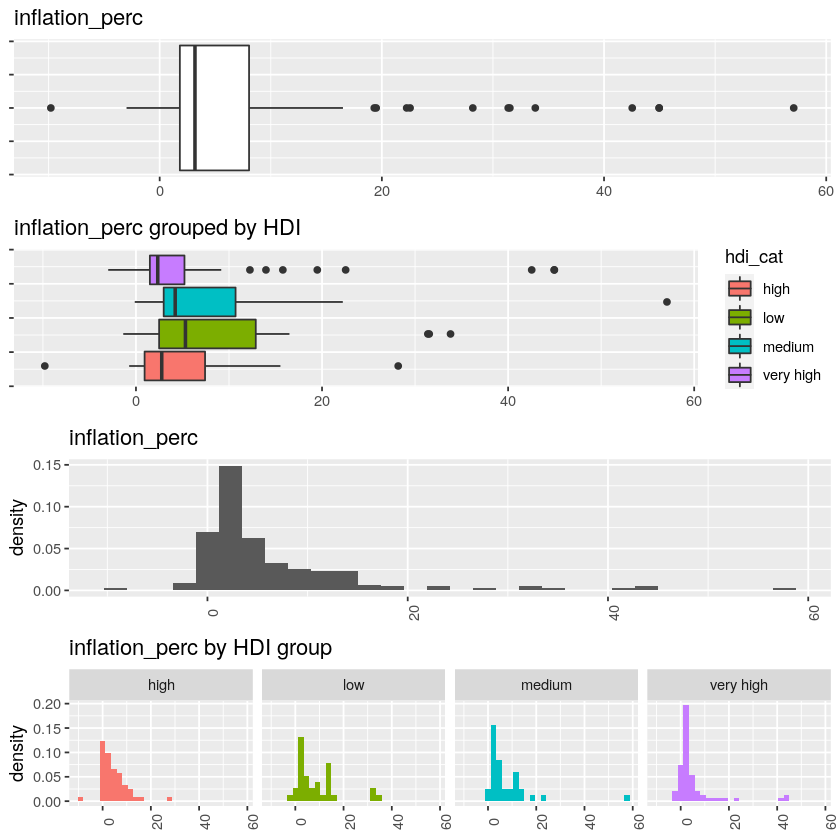

In [156]:
plots(dataset=df, col=cols[5], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Years of compulsory education

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


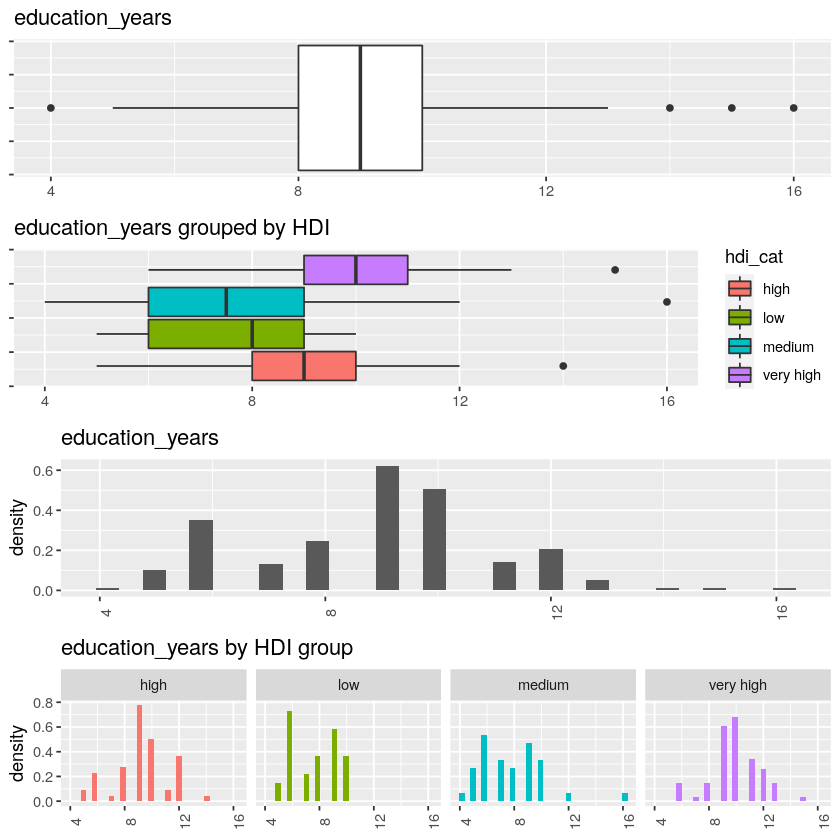

In [160]:
plots(dataset=df, col=cols[6], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Education budget as a percent of GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


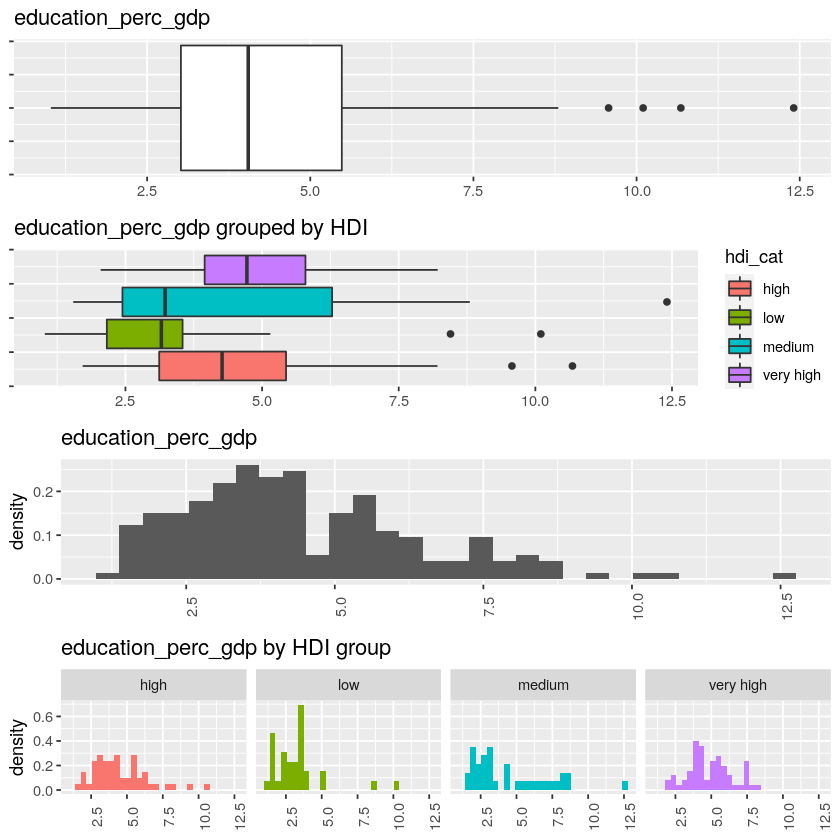

In [161]:
plots(dataset=df, col=cols[7], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


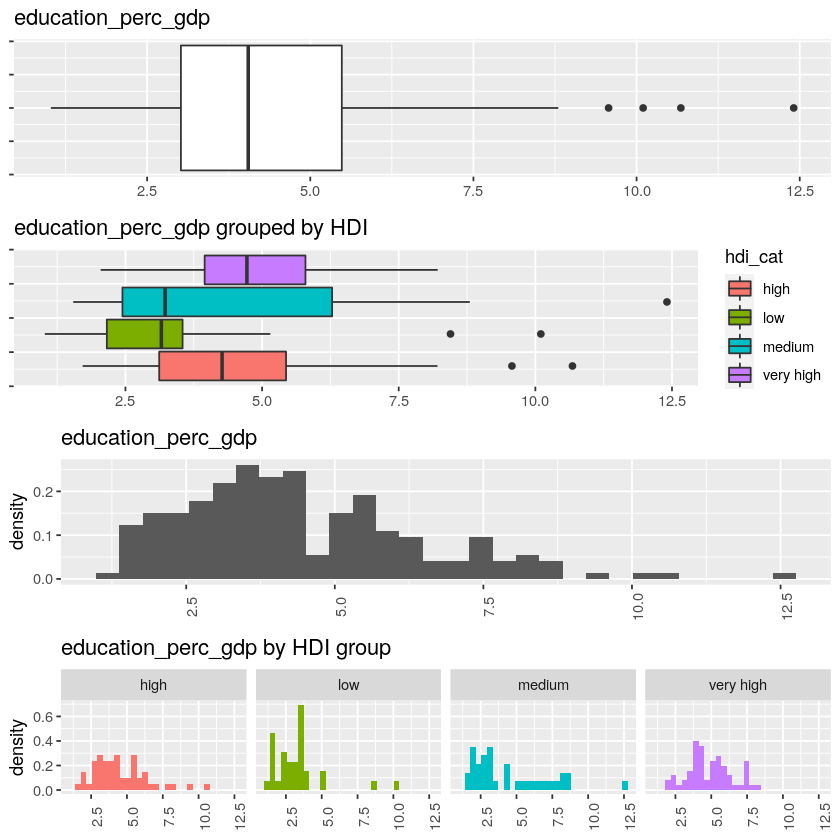

In [159]:
plots(dataset=df, col=cols[7], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Gross domestic savings as a percent of GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


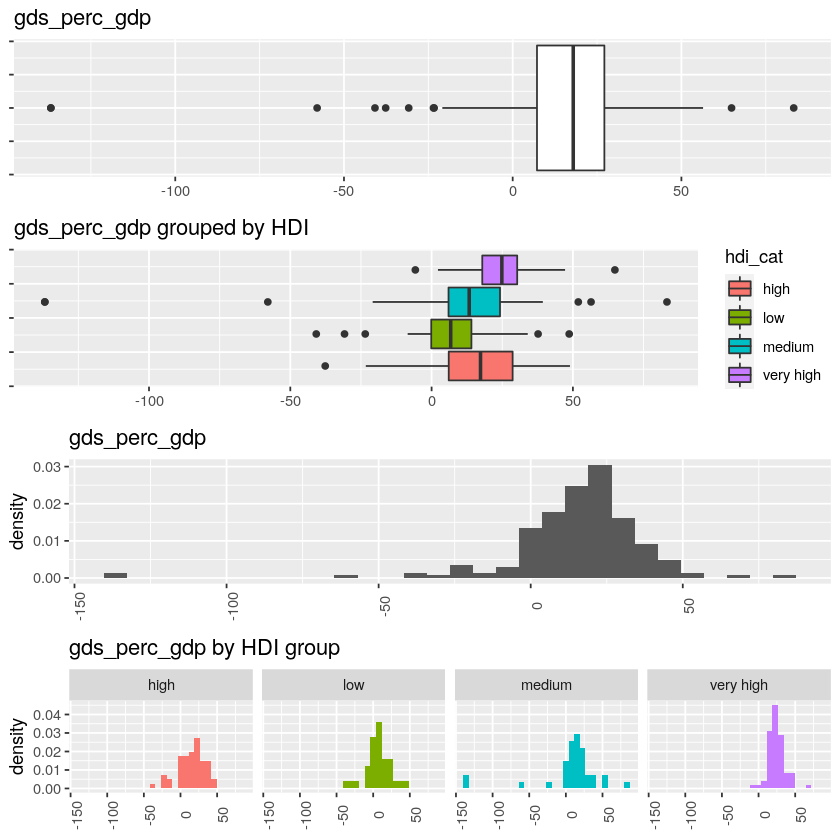

In [162]:
plots(dataset=df, col=cols[8], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Gross savings as a percentage of GDP

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


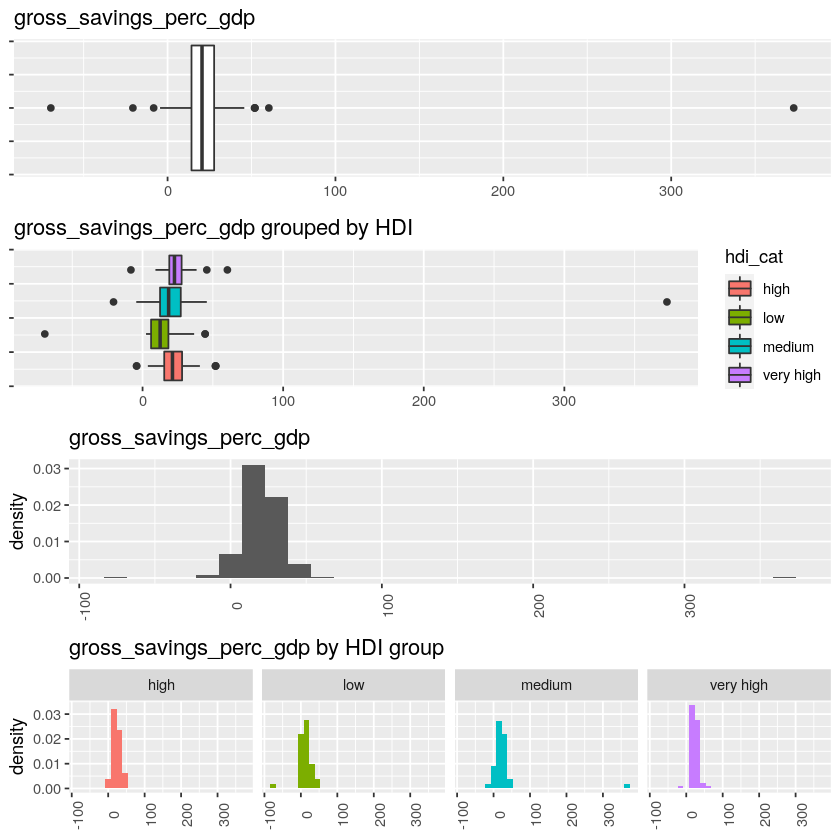

In [163]:
plots(dataset=df, col=cols[9], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### International tourism arrivals

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


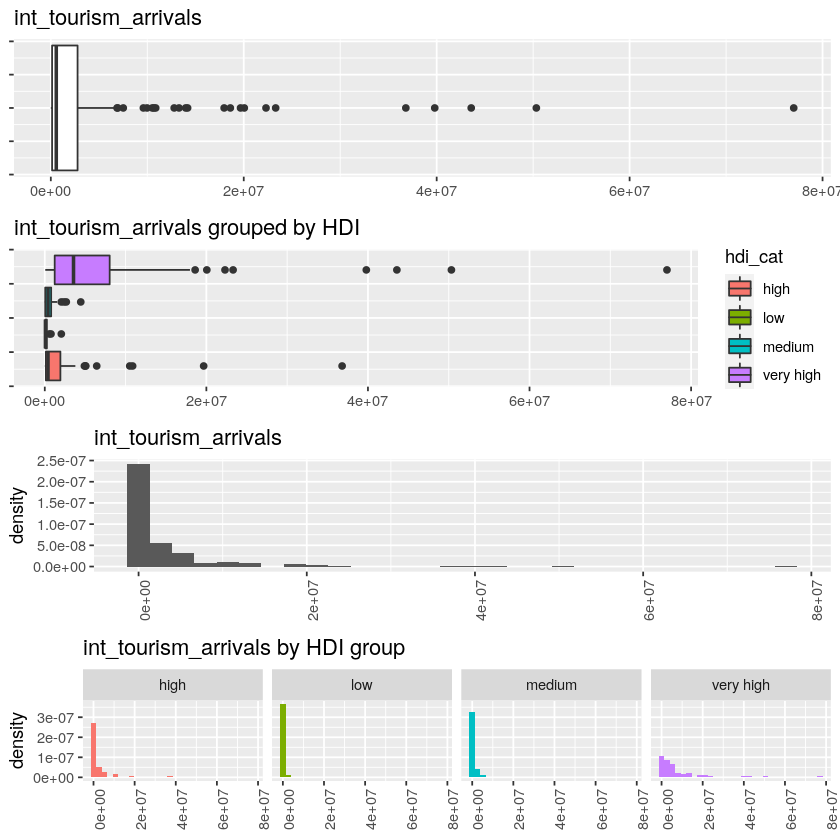

In [164]:
plots(dataset=df, col=cols[10], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### International tourism receipts

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


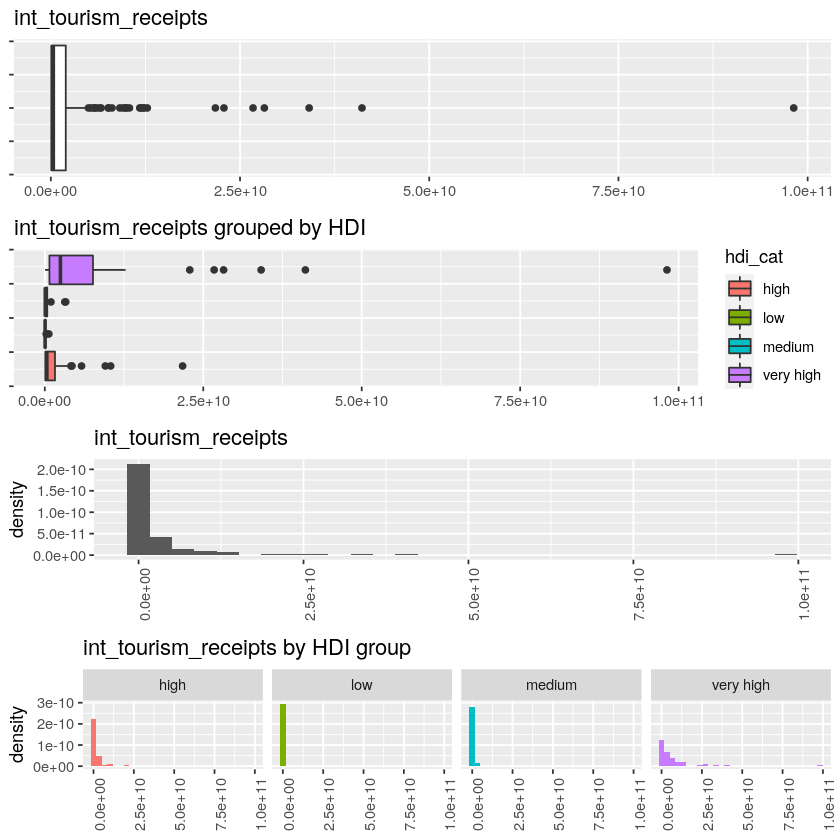

In [166]:
plots(dataset=df, col=cols[11], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Gross national income

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


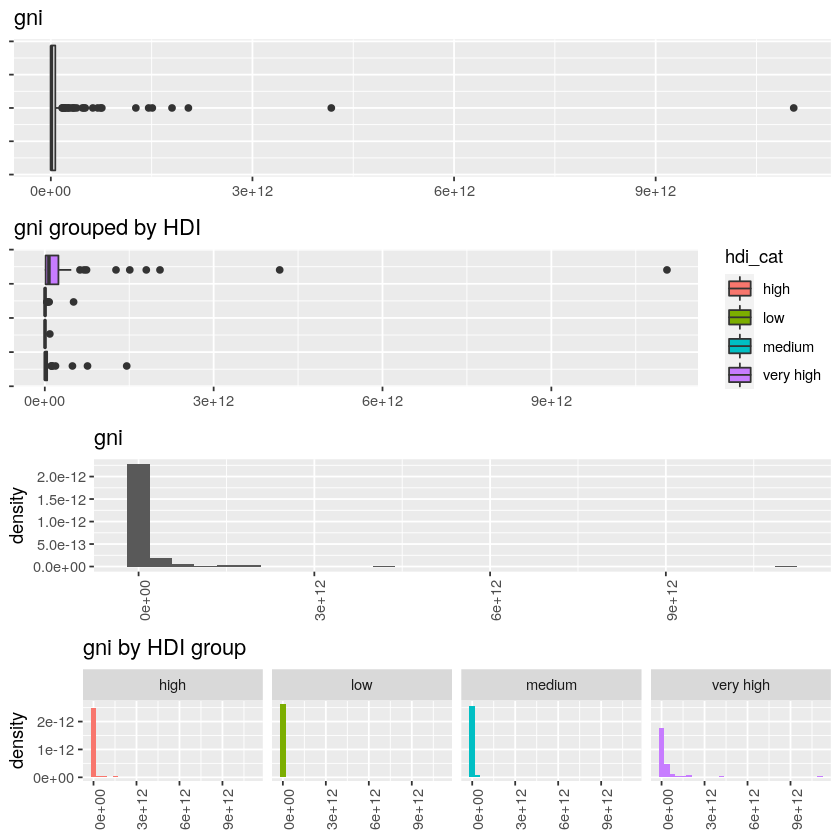

In [167]:
plots(dataset=df, col=cols[12], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Percentage of the population which use the internet

Warning message in if (bins == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (hist == "default") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (density == "default") {:
“the condition has length > 1 and only the first element will be used”


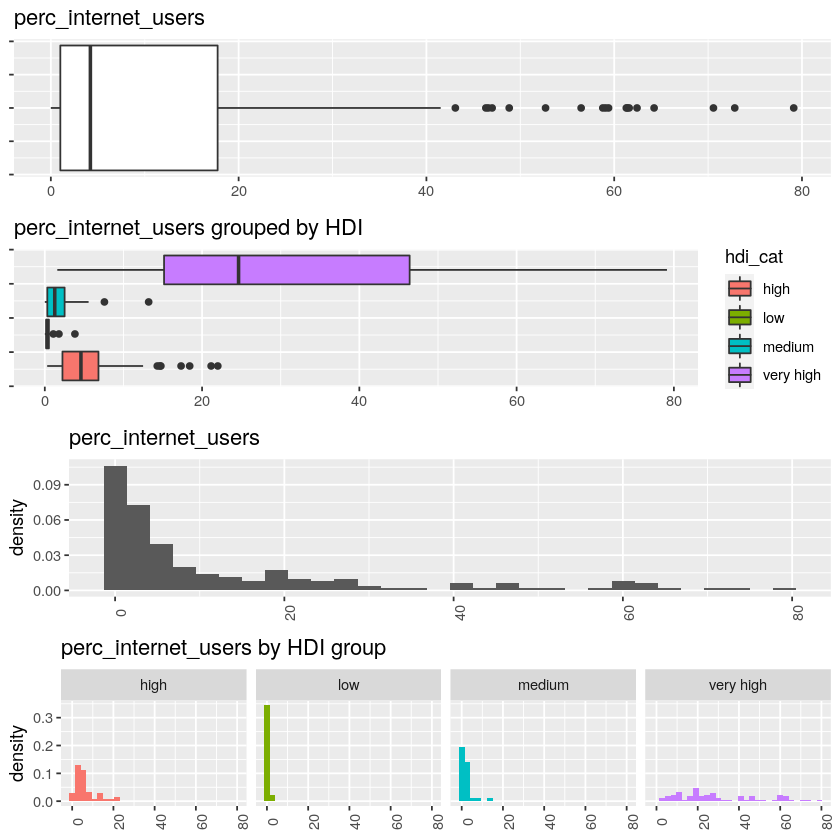

In [169]:
plots(dataset=df, col=cols[13], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

## Correlation plots

### General correlation plot (pearson)

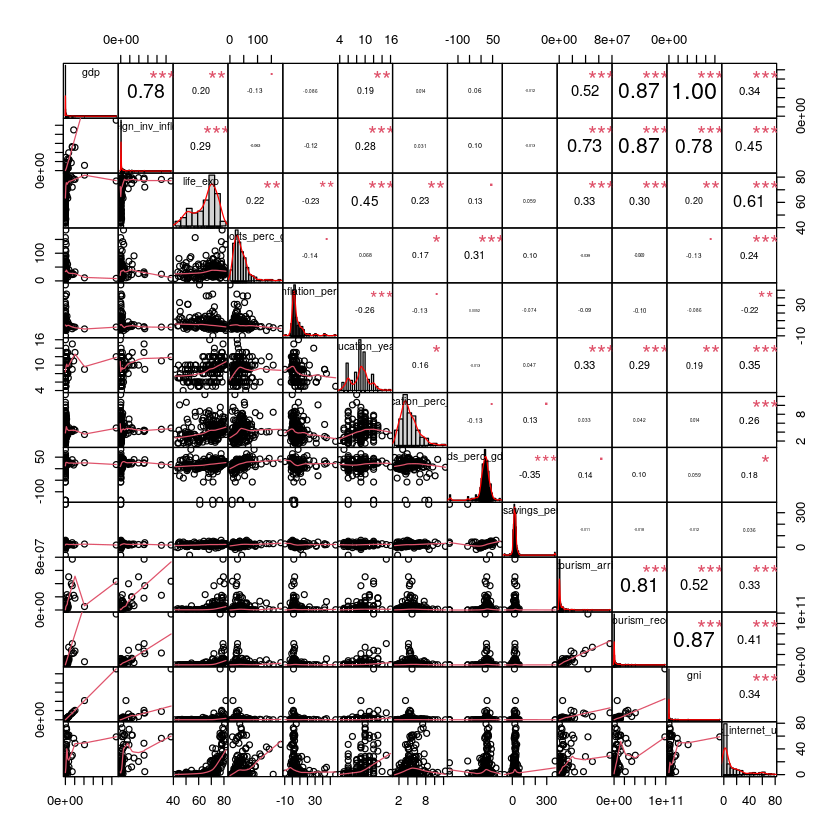

In [188]:
pa <- df %>% dplyr::select(cols)
chart.Correlation(pa, histogram=TRUE, pch=19, method="pearson")

### General correlation plot (spearman)

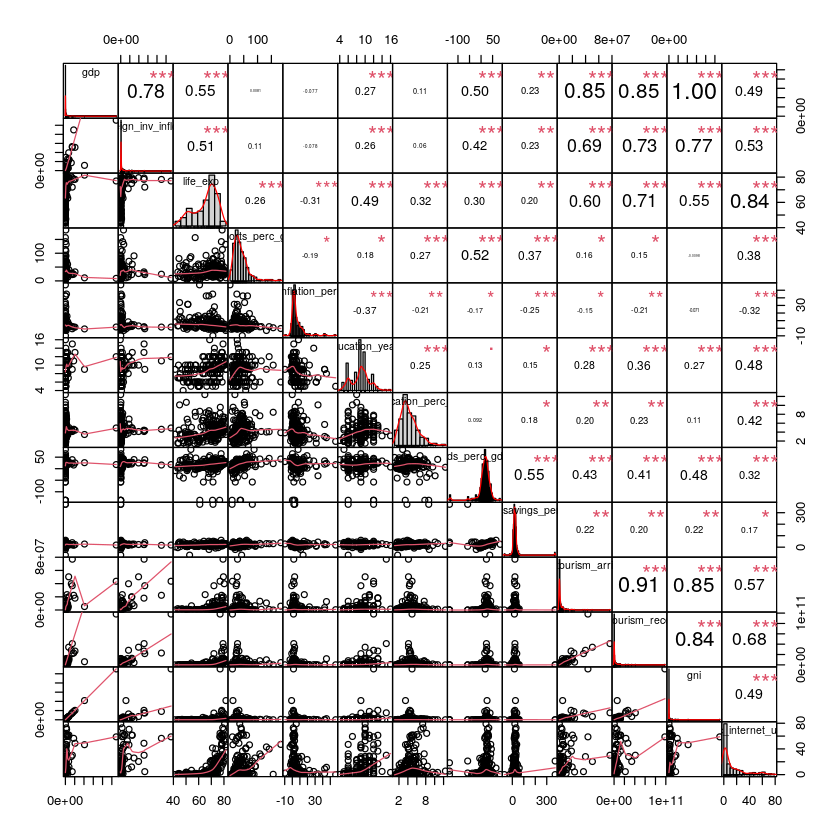

In [190]:
chart.Correlation(pa, histogram=TRUE, pch=19, method="spearman")

### Correlation matrix plot segregated by HDI

In [199]:
unique(cbind(df$hdi_cat, hdi_colours))

,hdi_colours
low,red
high,blueviolet
medium,black
very high,green


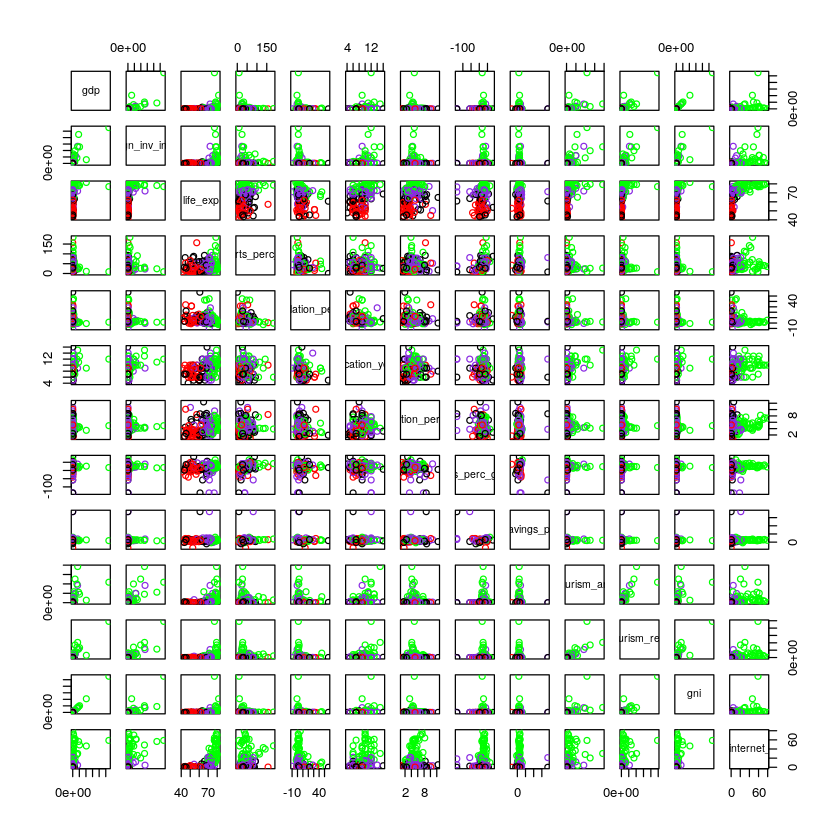

In [200]:
pairs(pa,pch=1,col=hdi_colours)